In [ ]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=447ce91fbfc24183d0b352bda964b2eef40cbf8e8c0583b50b55a6bccf90e99c
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends


In [91]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq


def get_interest_over_time(
    keywords: list,
    timeframe: str,
    chunksize: int = 1,
    cat: int = 0,
    geo: str = "",
    normalize: bool = True,
) -> pd.DataFrame:
    """Requests weekly search trend data for a list of keywords and writes results into a dataframe.
    Args:
        keywords (list): List of search keywords.
        timeframe (str): Requested timeframe in the format 'yyyy-mm-dd yyyy-mm-dd'.
        chunksize (int, optional): Group request into junks to gracefully call the API.
            Must be <= 5. Defaults to 1.
        cat (int, optional): Search category according to
            https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories. Defaults to 0.
        geo (str, optional): Geocode to localize search trends.
            See https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes for codes. Defaults to "".
        normalize (bool, optional): Whether to normalize individual keywords in the same chunk.
            If False, the trends for keywords in the same chunk are relative to each other. Defaults to True.
    Returns:
        pd.DataFrame: Dataframe holding the weekly search trends over time for the provided keywords.
    """

    def chunk_generator(lst, n):
        for i in range(0, len(lst), n):
            yield lst[i : i + n]

    chunks = chunk_generator(keywords, chunksize)

    df = pd.DataFrame(columns=["date"])
    pytrends = TrendReq(tz=360)
    for chunk in chunks:
        pytrends.build_payload(chunk, cat=cat, geo=geo, timeframe=timeframe)
        df_chunk = pytrends.interest_over_time()
        df_chunk = df_chunk.drop("isPartial", axis=1)
        df = pd.merge(df, df_chunk, how="right", on="date")
    df = df.set_index("date")

    if chunksize > 1 and normalize:
        df = df * (100 / df.max())

    df_longform = df.reset_index().melt(
        id_vars=["date"], var_name="Keyword", value_name="Interest"
    )
    return df_longform


def draw_ridgeplot(
    df_longform,
    aspect=30,
    height=0.45,
    palette="viridis",
    hspace=-0.15,
    reflinewidth=3,
    plotlinewidth=1.5,
    font="DejaVu Sans",
    indent=80,
):
    """
    Plots overlapping ridgeplot heavily inspired by
    https://seaborn.pydata.org/examples/kde_ridgeplot.html
    """

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    plt.rcParams["xtick.labelsize"] = 14
    plt.rcParams["font.family"] = [font]

    g = sns.FacetGrid(
        df_longform,
        row="Keyword",
        hue="Keyword",
        aspect=aspect,
        height=height,
        palette=palette,
    )

    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontsize=14,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes,
        )

    g.map(label, "date")
    g.map(plt.plot, "date", "Interest", color="white", linewidth=plotlinewidth)
    g.map(plt.fill_between, "date", "Interest", alpha=1)

    g.refline(y=0, linewidth=reflinewidth, linestyle="-", color=None, clip_on=False)

    g.figure.subplots_adjust(hspace=hspace)

    g.set_titles("")
    g.set(
        yticks=[],
        ylabel="",
        xlabel="",
        xlim=[
            df_longform["date"].min() - datetime.timedelta(days=indent),
            df_longform["date"].max(),
        ],
        xticks=[
            datetime.datetime(df_longform.date.min().year, i, 12) for i in range(1, 13)
        ],
        xticklabels=[
            "ENE",
            "FEB",
            "MAR",
            "ABR",
            "MAY",
            "JUN",
            "JUL",
            "AUG",
            "SEP",
            "OCT",
            "NOV",
            "DEC",
        ],
    )
    TEMA = input("Escribe el tema del título: ")
    g.despine(bottom=True, left=True)
    plt.suptitle(f"{TEMA} 2022", fontsize=20)
    plt.show()

In [ ]:
#Lo que queremos buscar:
keywords = ["Djokovic", #Djokovic detenido en Australia
            "Vox", #Vox entra por primera vez en un gobierno autonómico
            "Ucrania", #Guerra en Ucrania
            "Will Smith", #Will Smit a Chris Rock en los Oscar
            "Rey Juan Carlos", #Regreso de Juan Carlos a España tras su expatriación a Dubái en 2020
            "OTAN",
            "Inflación", #Inflación desbocada hasta el 10.2%, su nivel más alto en 37 años en España
            "Viruela de mono", #La OMS activa su máximo nivel de alerta global ante el brote de viruela de mono
            "WEBB", #El telescopio WEBB muestra una de las galaxias más lejanas observadas
            "Boris Johnson", #Boris Johnson dimite y nombra un gobierno provisional
            "ISABEL II", #Muere la reina ISABEL II a los 96 años
            "Carlos Alcaraz", #Carlos Alcaraz el tenista más joven en conseguir el número 1
            "Giorgia Meloni", #La ultraderechista GIORGIA MELONI gana las elecciones en Italia
            "Elon Musk", #Elon Musk compra Twitter por 44 millones de dólares
            "Argentina", #Argentina gana el mundial de futbol
            "Twitter", #Despidos masivos en 
            ]

## **DEPORTE**

In [80]:
#Lo que queremos buscar:
keywordsDEPORTE = ["Djokovic", #Djokovic detenido en Australia
            "Argentina", #Argentina gana el mundial de futbol
            "Carlos Alcaraz", #Carlos Alcaraz el tenista más joven en conseguir el número 1
            "Saúl Craviotto",
            "Verstappen",
            "Roger Federer"
]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Escribe el tema del título: DEPORTE


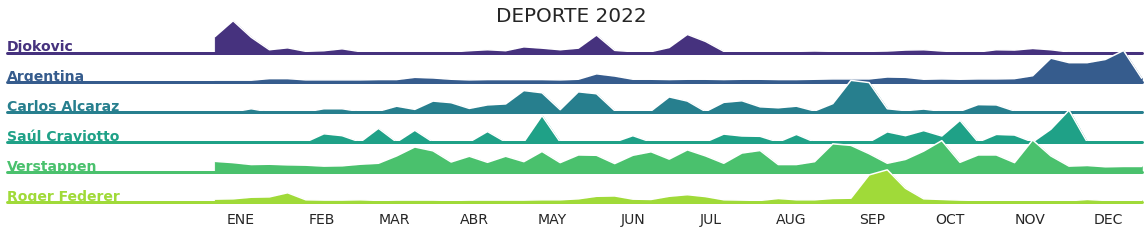

In [81]:
#Ejecutamos:
dfDEPORTE = get_interest_over_time(
    keywordsDEPORTE, "2022-01-01 2023-01-01")

draw_ridgeplot(dfDEPORTE)

## **POLITICA**

In [82]:
#Lo que queremos buscar:
keywordsPOLITICA = ["Vox España", #Vox entra por primera vez en un gobierno autonómico
            "Ucrania", #Guerra en Ucrania
            "Juan Carlos I", #Regreso de Juan Carlos a España tras su expatriación a Dubái en 2020
            "OTAN",
            "Boris Johnson", #Boris Johnson dimite y nombra un gobierno provisional
            "Giorgia Meloni", #La ultraderechista GIORGIA MELONI gana las elecciones en Italia
            "Vladimir Putin"
]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Escribe el tema del título: POLÍTICA


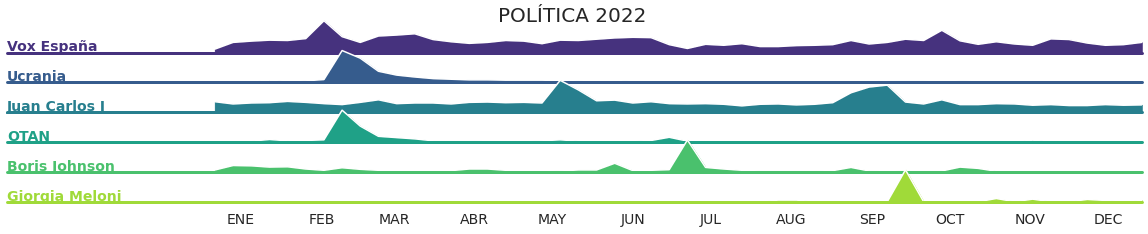

In [84]:
#Ejecutamos:
dfPOLITICA = get_interest_over_time(
    keywordsPOLITICA, "2022-01-01 2023-01-01")

draw_ridgeplot(dfPOLITICA)

## **ECONOMÍA**

In [66]:
#Lo que queremos buscar:
keywordsECONOMÍA = ["Gasolina", 
            "Criptomonedas", 
            "Mercado inmobiliario",
            "Crisis energética",
            "Recesión mundial",
            "Inflación", 
            "Pensiones",
            "Salario mínimo", 
            "Precios alimentación",
            "Twitter", 
            "Elon Musk"
            ]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Escribe el tema del título: ECONOMÍA


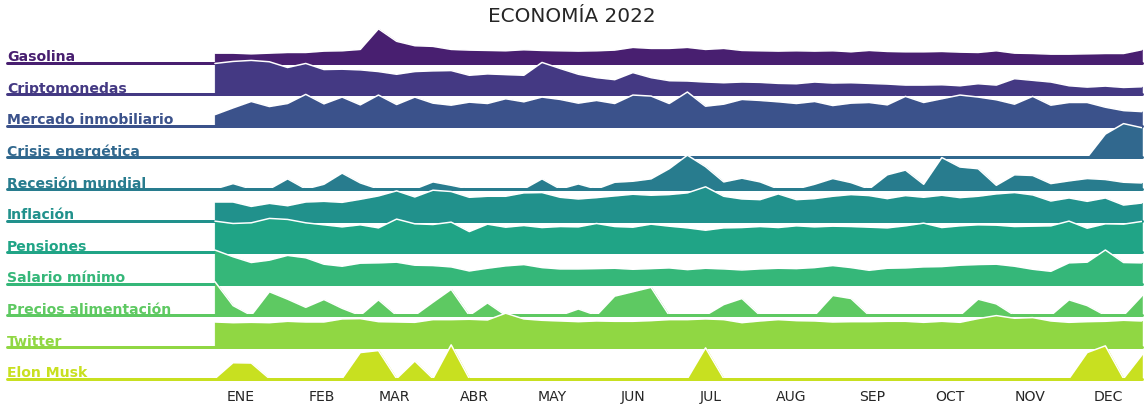

In [85]:
#Ejecutamos:
dfECONOMÍA = get_interest_over_time(
    keywordsECONOMÍA, "2022-01-01 2023-01-01")

draw_ridgeplot(dfECONOMÍA)

## **SOCIAL**

In [89]:
#Lo que queremos buscar:
keywordsSOCIAL = ["Will Smith", 
            "Johnny Depp", 
            "Isabel II"
            ]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Escribe el tema del título: SOCIAL


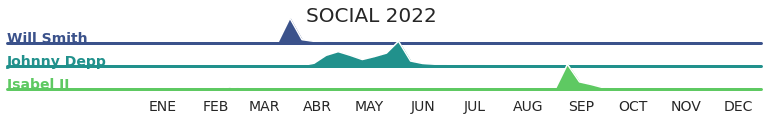

In [92]:
#Ejecutamos:
dfSOCIAL = get_interest_over_time(
    keywordsSOCIAL, "2022-01-01 2023-01-01")

draw_ridgeplot(dfSOCIAL)

## **BIG DATA**

In [95]:
#Lo que queremos buscar:
keywordsBIGDATA = ["Machine Learning",
            "Business Intelligence",
            "Data Science",
            "Data Warehouse",
            "Data Lake",
            "ETL", 
            "Azure",
            "AWS",
            "R",
            "SQL",
            "Python",
            "Tableau",
            "PowerBI"
            ]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Escribe el tema del título: BIG DATA


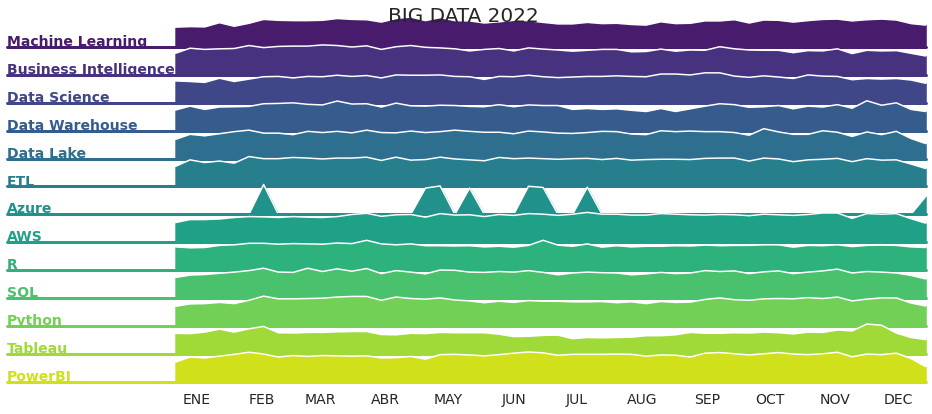

In [96]:
#Ejecutamos:
dfBIGDATA = get_interest_over_time(
    keywordsBIGDATA, "2022-01-01 2023-01-01")

draw_ridgeplot(dfBIGDATA)